# WeatherPy
----

### Analysis Observations
1. The temperatures increase as one approaches the equator and cities located in the Southern hemisphere are warmer in January (experiencing their summer) while those cities in the Northern Hemisphere are experiencing colder winter weather.
2. There doesn't appear to be a correlation between percent humidity and proximity to the equator. Which makes sense since warmer air can hold more water vapor than cooler air, relative humidity tends to drop as temperature rises if no moisture is added to the air.  It would be interesting here to look at dew point vs. latitude as a correlation is more like exist in that comparison.
3. There also doesn't appear to be a correlation between cloudiness and latitude.  Cloudiness is evenly distributed across all measured latitudes.  However, there are several clusters of percent cloudiness measurements at 0, 20, 40, 80 and 100% cloudiness.
4. Wind speed also appears to have no correlation with latitude which might be an interesting finding if you consider that temperature is also often a factor of wind speed.  However, since pressure gradient and Rossby waves (which travel globally West to East) are also factors of wind speed it is likely that regional/latitudinal temperature trends have less of an effect on wind speed.  


In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from ratelimit import limits

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# Create a df to hold randomly generated cities & countries 
column_names = ["City", "Country"]
rand_cities_df = pd.DataFrame(columns=column_names)

# Randomly generate a list of 2000 cities.
for x in range(2000):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    rand_cities_df = rand_cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

#Remove duplicate cities
rand_cities_df = rand_cities_df.drop_duplicates(subset='City').reset_index()
rand_cities_df.count()

index      726
City       726
Country    726
dtype: int64

In [30]:
# Double check the random cities data frame
rand_cities_df

,index,City,Country
0,0,ruteng,id
1,1,lebu,cl
2,2,kresttsy,ru
3,3,ushuaia,ar
4,4,selkirk,ca
5,5,upernavik,gl
6,6,luganville,vu
7,7,busselton,au
8,8,saldanha,za
9,9,saint george,bm


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
#Create a dataframe to hold all of the API call data
col_names = ["City", "Country", "Date", "Max Temp", "Lat", "Lng", "Humidity", "Cloudiness", "Wind Speed"]
api_cities_df = pd.DataFrame(columns=col_names)

# Loop through the list of cities and add the data to the dataframe.
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
print("-------------------------")
for index, row in rand_cities_df.iterrows():
    time.sleep(2)
    query_city = row["City"]
    query_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + query_city.replace(" ","+")
    city_data = requests.get(query_url).json()
        
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        api_cities_df.set_value(index, "City", city_data["name"])
        api_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        api_cities_df.set_value(index, "Date", city_data["dt"])
        api_cities_df.set_value(index, "Max Temp", city_data["main"]["temp_max"])
        api_cities_df.set_value(index, "Lat", city_data["coord"]["lat"])
        api_cities_df.set_value(index, "Lng", city_data["coord"]["lon"])
        api_cities_df.set_value(index, "Humidity", city_data["main"]["humidity"])
        api_cities_df.set_value(index, "Cloudiness", city_data["clouds"]["all"])
        api_cities_df.set_value(index, "Wind Speed", city_data["wind"]["speed"])
        print("------------------------")
        print("Processing Record ", row_count, ' | ' , city_data["name"])
        row_count += 1


Beginning Data Retrieval
-------------------------


/anaconda3/envs/databootcampenv/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/databootcampenv/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/databootcampenv/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/databootcampenv/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/databootcampenv/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future

------------------------
Processing Record  1  |  Ruteng
------------------------
Processing Record  2  |  Lebu
------------------------
Processing Record  3  |  Kresttsy
------------------------
Processing Record  4  |  Ushuaia
------------------------
Processing Record  5  |  Selkirk
------------------------
Processing Record  6  |  Upernavik
------------------------
Processing Record  7  |  Luganville
------------------------
Processing Record  8  |  Busselton
------------------------
Processing Record  9  |  Saldanha
------------------------
Processing Record  10  |  Saint George
------------------------
Processing Record  11  |  East London
------------------------
Processing Record  12  |  Klaksvik
------------------------
Processing Record  13  |  Georgetown
------------------------
Processing Record  14  |  Kavieng
------------------------
Processing Record  15  |  Kapaa
City not found, skipping...
City not found, skipping...
------------------------
Processing Record  16  |  C

------------------------
Processing Record  128  |  Arraial do Cabo
City not found, skipping...
------------------------
Processing Record  129  |  Rorvik
------------------------
Processing Record  130  |  Longyearbyen
------------------------
Processing Record  131  |  Mahebourg
------------------------
Processing Record  132  |  Hamilton
------------------------
Processing Record  133  |  Constitucion
------------------------
Processing Record  134  |  Sivani
------------------------
Processing Record  135  |  Port Elizabeth
------------------------
Processing Record  136  |  Taywarah
------------------------
Processing Record  137  |  Zasheyek
------------------------
Processing Record  138  |  Smithers
------------------------
Processing Record  139  |  Gagra
------------------------
Processing Record  140  |  Savannah Bight
------------------------
Processing Record  141  |  Santa Maria
------------------------
Processing Record  142  |  Saskylakh
------------------------
Process

City not found, skipping...
City not found, skipping...
------------------------
Processing Record  254  |  Maureni
------------------------
Processing Record  255  |  Laguna
------------------------
Processing Record  256  |  Opuwo
------------------------
Processing Record  257  |  Souillac
------------------------
Processing Record  258  |  Leshukonskoye
------------------------
Processing Record  259  |  Petropavlovsk-Kamchatskiy
------------------------
Processing Record  260  |  Sterling
------------------------
Processing Record  261  |  Vila Velha
------------------------
Processing Record  262  |  Tocopilla
------------------------
Processing Record  263  |  Puerto Madryn
------------------------
Processing Record  264  |  Ponta do Sol
------------------------
Processing Record  265  |  Toora-Khem
------------------------
Processing Record  266  |  Kathu
------------------------
Processing Record  267  |  Hofn
------------------------
Processing Record  268  |  Khandbari
-----

------------------------
Processing Record  383  |  Lithgow
------------------------
Processing Record  384  |  Tarabuco
------------------------
Processing Record  385  |  Jasper
------------------------
Processing Record  386  |  Emerald
------------------------
Processing Record  387  |  Lucapa
------------------------
Processing Record  388  |  Esqueda
------------------------
Processing Record  389  |  Jablah
------------------------
Processing Record  390  |  Flin Flon
City not found, skipping...
------------------------
Processing Record  391  |  Shache
City not found, skipping...
------------------------
Processing Record  392  |  Ararangua
------------------------
Processing Record  393  |  Tarakan
------------------------
Processing Record  394  |  Honiara
------------------------
Processing Record  395  |  Ihosy
------------------------
Processing Record  396  |  San Cristobal
------------------------
Processing Record  397  |  Tamandare
City not found, skipping...
---------

------------------------
Processing Record  511  |  Yenotayevka
------------------------
Processing Record  512  |  Eyl
------------------------
Processing Record  513  |  Alta Gracia
City not found, skipping...
------------------------
Processing Record  514  |  Severodvinsk
------------------------
Processing Record  515  |  Ila
------------------------
Processing Record  516  |  Narrabri
------------------------
Processing Record  517  |  Pomabamba
------------------------
Processing Record  518  |  Joshimath
------------------------
Processing Record  519  |  Lebane
------------------------
Processing Record  520  |  Santa Isabel
City not found, skipping...
------------------------
Processing Record  521  |  Susanville
City not found, skipping...
------------------------
Processing Record  522  |  Nemuro
City not found, skipping...
------------------------
Processing Record  523  |  Kjollefjord
------------------------
Processing Record  524  |  Vao
------------------------
Process

------------------------
Processing Record  640  |  Ndola
------------------------
Processing Record  641  |  Port Macquarie
------------------------
Processing Record  642  |  Beira
------------------------
Processing Record  643  |  Santa Vitoria do Palmar
------------------------
Processing Record  644  |  Aleksandrov Gay
------------------------
Processing Record  645  |  Jinchang
------------------------
Processing Record  646  |  Ostersund
------------------------
Processing Record  647  |  Nouadhibou
------------------------
Processing Record  648  |  Senneterre
------------------------
Processing Record  649  |  High Level
------------------------
Processing Record  650  |  Devrek
------------------------
Processing Record  651  |  Glens Falls
------------------------
Processing Record  652  |  Yerbogachen
------------------------
Processing Record  653  |  Belaya Gora


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Make sure there are at least 500 cities that have been retrieved.
api_cities_df.count()

City          653
Country       653
Date          653
Max Temp      653
Lat           653
Lng           653
Humidity      653
Cloudiness    653
Wind Speed    653
dtype: int64

In [34]:
# Review the API Cities dataframe
api_cities_df.head()

,City,Country,Date,Max Temp,Lat,Lng,Humidity,Cloudiness,Wind Speed
0,Ruteng,ID,1547940484,76.25,-8.61,120.46,93,8,3.51
1,Lebu,ET,1547940217,37.68,8.96,38.73,81,0,2.51
2,Kresttsy,RU,1547940488,22.79,58.25,32.52,89,88,15.59
3,Ushuaia,AR,1547938800,50,-54.81,-68.31,61,40,34.45
4,Selkirk,CA,1547938800,-14.81,50.15,-96.88,62,40,4.7


In [35]:
# Save the API cities dataframe to a csv file
api_cities_df.to_csv("api_cities_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

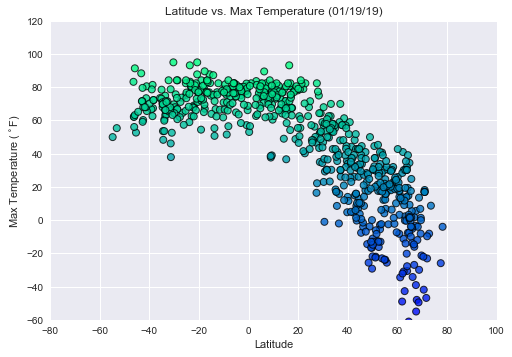

In [51]:
# Create a scatter plot for Latitude vs. Temperature
plt.scatter(api_cities_df["Lat"], 
            api_cities_df["Max Temp"], c=api_cities_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='winter', alpha=0.8, label="City")

# Apply additional graph fortmatting, axis labels and chart title
plt.style.use('seaborn')
plt.title(f"Latitude vs. Max Temperature (01/19/19)")
plt.ylabel("Max Temperature ($^\circ$F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

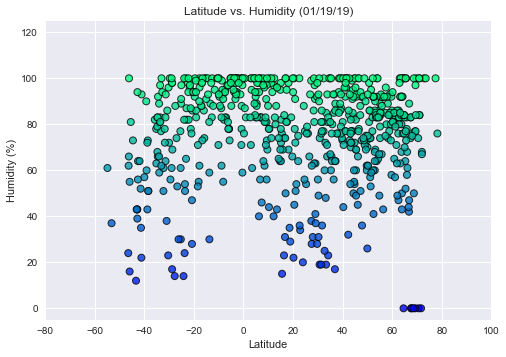

In [53]:
# Create a scatter plot for Latitude vs. Humidity

plt.scatter(api_cities_df["Lat"], 
            api_cities_df["Humidity"], c=api_cities_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='winter', alpha=0.8, label="City")

# Apply additional graph fortmatting, axis labels and chart title
plt.style.use('seaborn')
plt.title(f"Latitude vs. Humidity (01/19/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

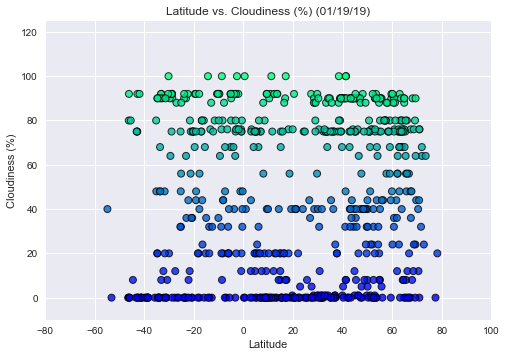

In [52]:
# Create a scatter plot for Latitude vs. Cloudiness
plt.scatter(api_cities_df["Lat"], 
            api_cities_df["Cloudiness"], c=api_cities_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='winter', alpha=0.8, label="City")

# Apply additional graph fortmatting, axis labels and chart title
plt.style.use('seaborn')
plt.title(f"Latitude vs. Cloudiness (%) (01/19/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

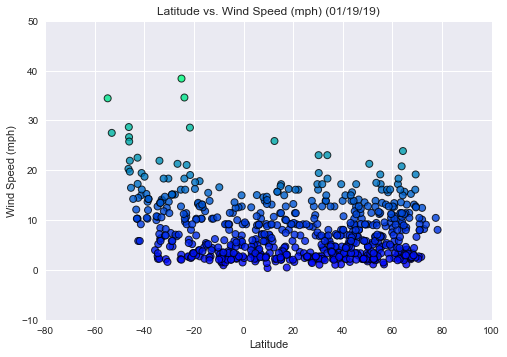

In [54]:
# Create a scatter plot for Latitude vs. Wind Speed (mph)
plt.scatter(api_cities_df["Lat"], 
            api_cities_df["Wind Speed"], c=api_cities_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='winter', alpha=0.8, label="City")

# Apply additional graph fortmatting, axis labels and chart title
plt.style.use('seaborn')
plt.title(f"Latitude vs. Wind Speed (mph) (01/19/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()